___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [35]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#To display the plots
%matplotlib inline
from ipywidgets import interact
import plotly.io as pio

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:,.2f}'.format

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

In [36]:

params = {
'figure.figsize':(12,8),
'figure.titlesize':15,
'font.size': 14,
'axes.titlesize': 12,
'axes.labelsize': 12,
'xtick.labelsize': 12,
'ytick.labelsize': 12,
'legend.fontsize': 12
}
plt.rcParams.update(params)

#### Load Dataset

In [37]:
data = pd.read_csv("/Users/lavondaharrison/Desktop/Clarusway/Machine Learning Module/Machine Learning ML -12:22/ML Project Notebooks and Solutions/ML -Project 3 Clustering Analysis_Customers_Segmentation _Project/3. Customer Segmentation/Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


#### Explore Data

You can rename columns to more usable, if you need.

In [38]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [39]:
data.drop('CustomerID', axis=1, inplace=True)
data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [40]:
data.rename(columns={"Annual Income (k$)":"Annual_Income",
                  "Spending Score (1-100)":"Spending_Score"}, inplace=True)

In [41]:
data.head(5)

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual_Income   200 non-null    int64 
 3   Spending_Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [43]:
data.describe(include="all")

,Gender,Age,Annual_Income,Spending_Score
count,200,200.00,200.00,200.00
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.85,60.56,50.20
std,NaN,13.97,26.26,25.82
min,NaN,18.00,15.00,1.00
25%,NaN,28.75,41.50,34.75
50%,NaN,36.00,61.50,50.00
75%,NaN,49.00,78.00,73.00


In [44]:
data.shape

(200, 4)

In [45]:
data.duplicated().sum()

0

In [46]:
data.nunique()

Gender             2
Age               51
Annual_Income     64
Spending_Score    84
dtype: int64

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





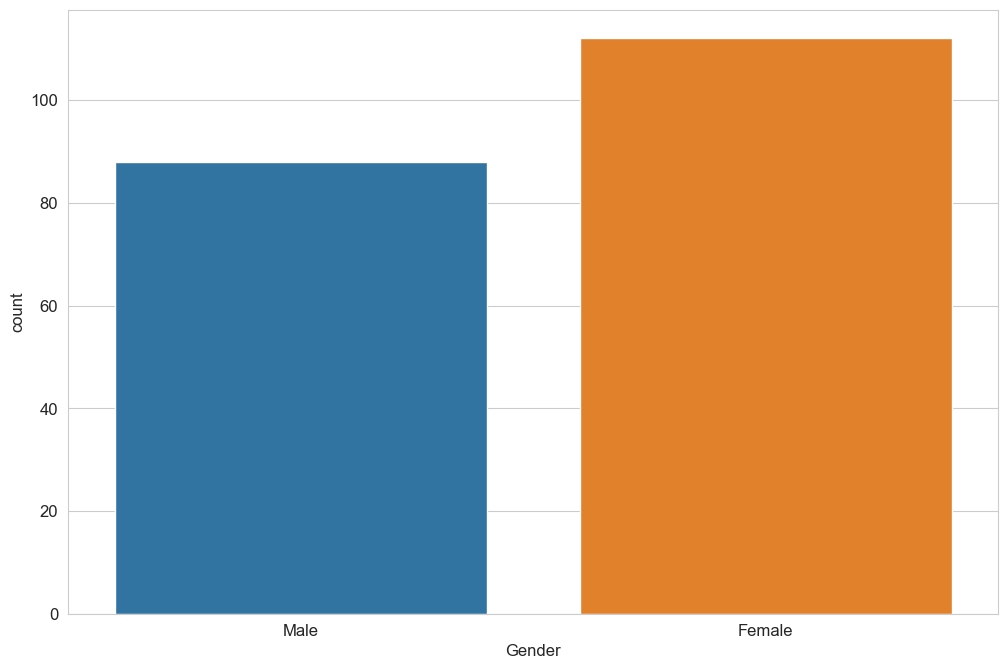

In [47]:
#plt.figure(figsize=(15,5))
ax = sns.countplot(x=data.Gender);

In [48]:
data.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

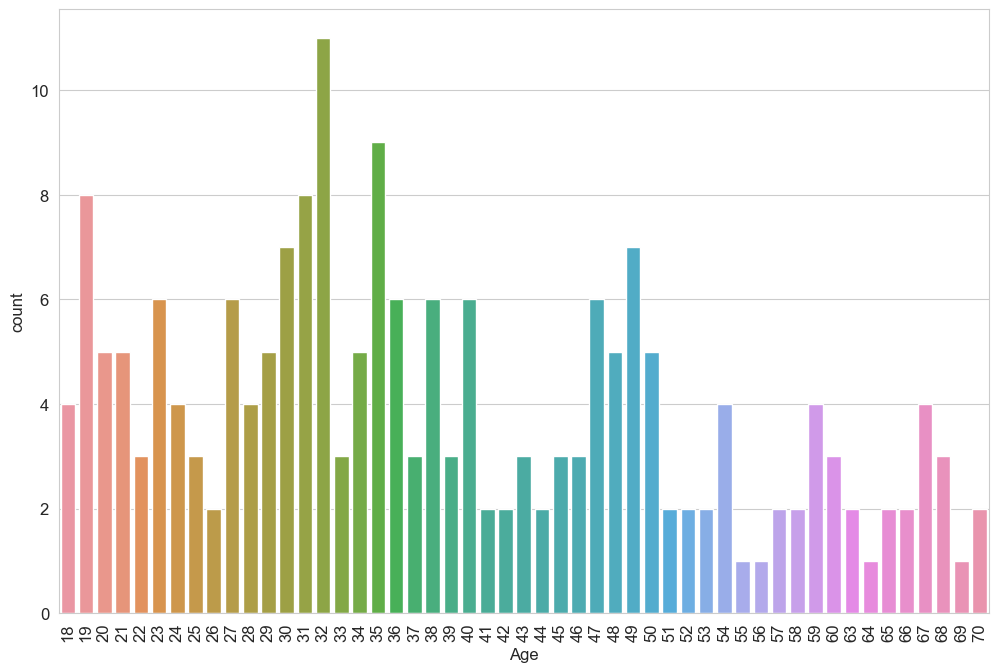

In [49]:
#plt.figure(figsize=(14,10))
ax = sns.countplot(x=data.Age)

plt.xticks(rotation=90);

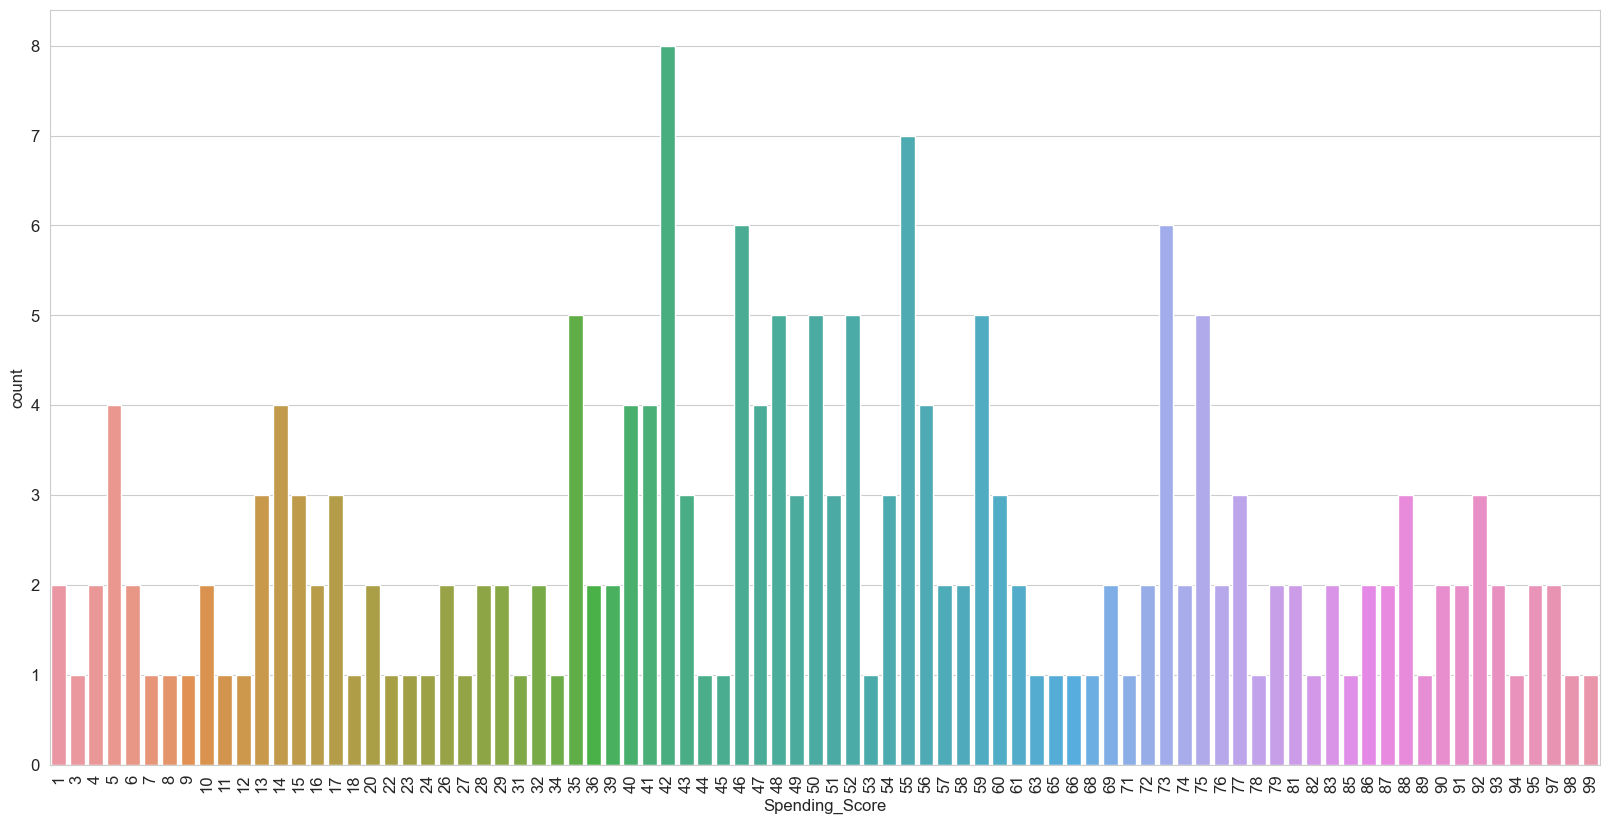

In [50]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=data.Spending_Score)

plt.xticks(rotation=90);

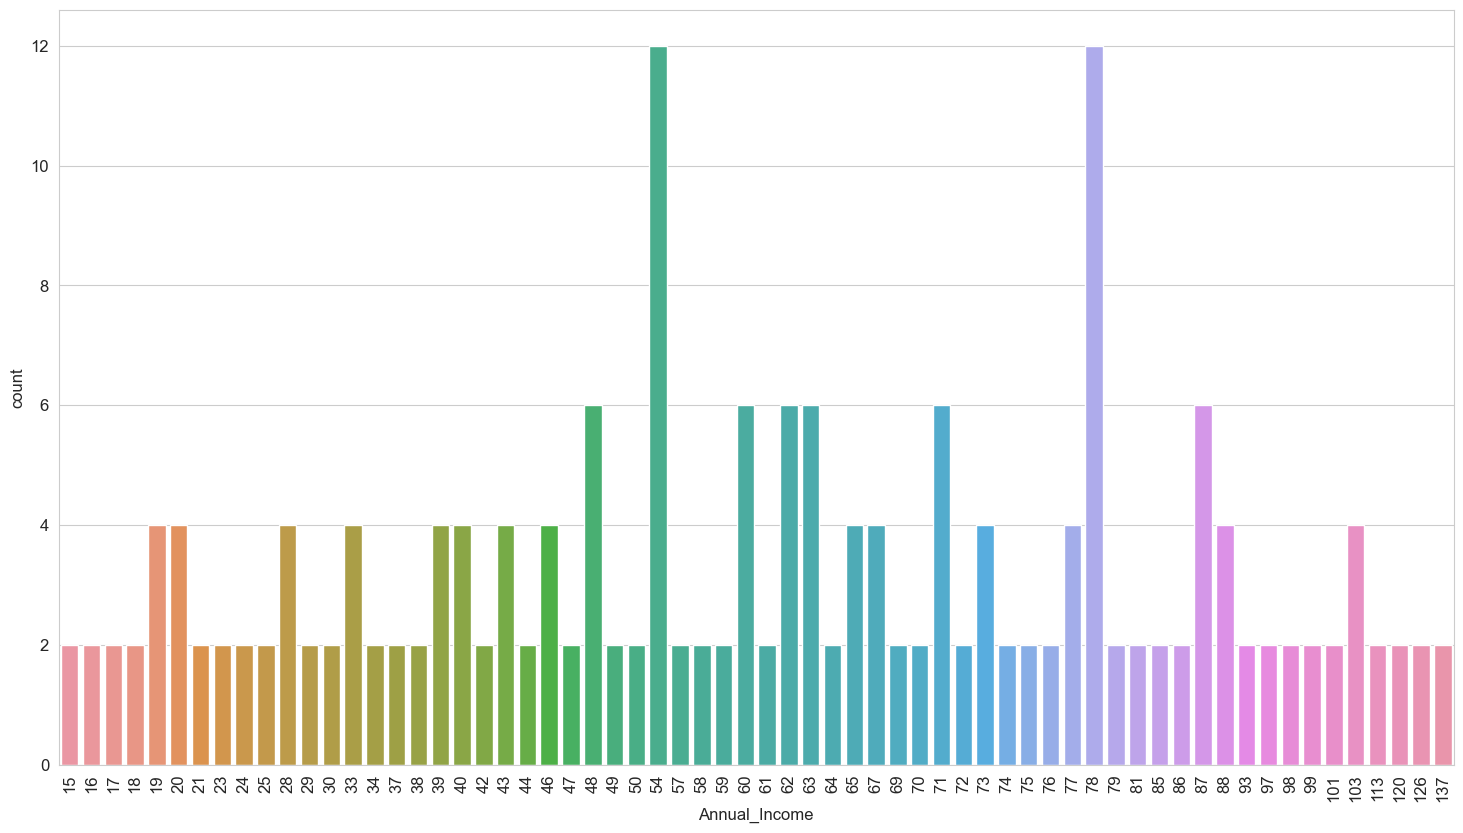

In [51]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x=data.Annual_Income)

plt.xticks(rotation=90);

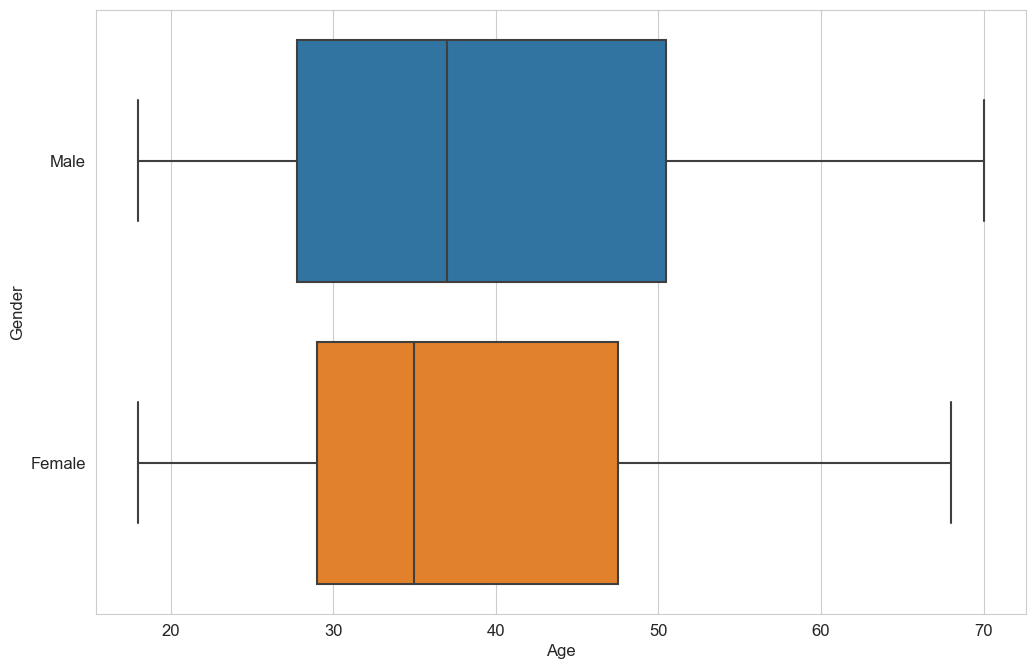

In [52]:
sns.boxplot(data=data, x="Age", y="Gender");

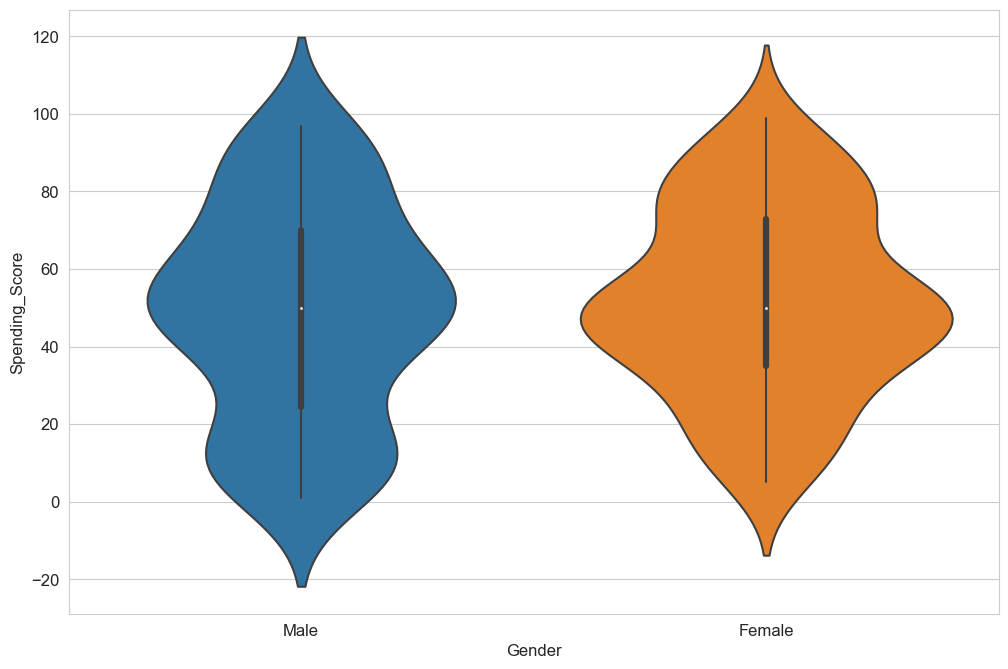

In [53]:
sns.violinplot(data = data ,x="Gender",y="Spending_Score");

In [54]:
data.corr()

,Age,Annual_Income,Spending_Score
Age,1.00,-0.01,-0.33
Annual_Income,-0.01,1.00,0.01
Spending_Score,-0.33,0.01,1.00


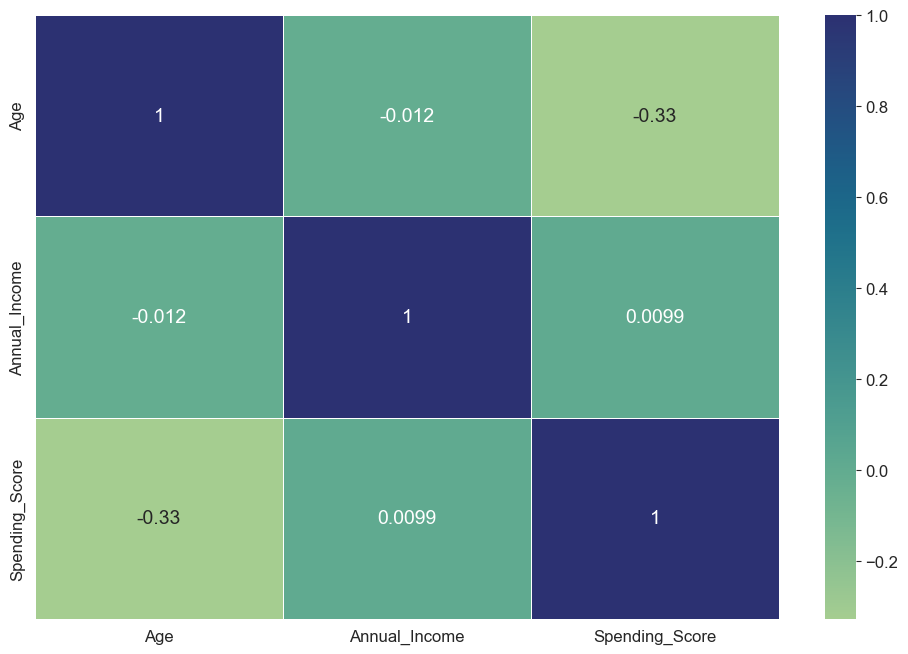

In [55]:
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = "crest");

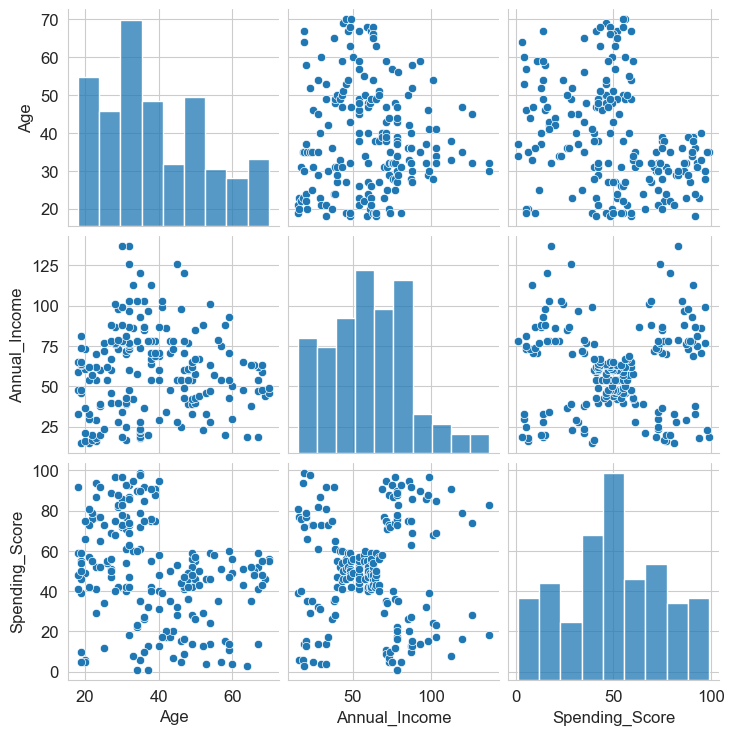

In [56]:
sns.pairplot(data)
plt.show()


In [57]:
data.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

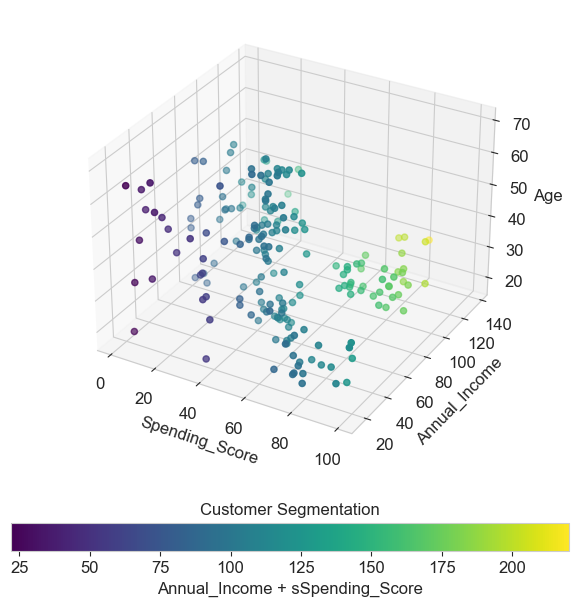

In [58]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    data['Spending_Score'], data['Annual_Income'], data['Age'],  
    c=data['Annual_Income']+data['Spending_Score'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('Spending_Score')
ax.set_ylabel('Annual_Income')
ax.set_zlabel('Age')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='Annual_Income + sSpending_Score',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=12)
plt.show();

In [59]:
data= pd.get_dummies(data, drop_first=True)
data.head()

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [60]:
data.rename(columns={"Gender_Male":"Gender"}, inplace=True)
data.head(2)

,Age,Annual_Income,Spending_Score,Gender
0,19,15,39,1
1,21,15,81,1


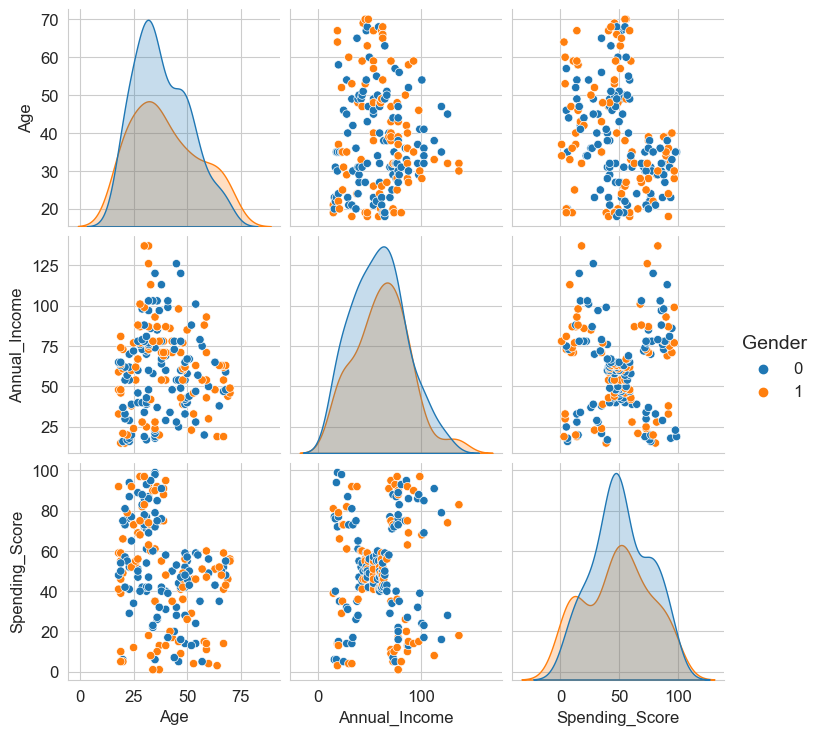

In [61]:
# Examining data for pattern?
sns.pairplot(data, hue='Gender')
plt.show()

In [62]:
data.columns

Index(['Age', 'Annual_Income', 'Spending_Score', 'Gender'], dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             200 non-null    int64
 1   Annual_Income   200 non-null    int64
 2   Spending_Score  200 non-null    int64
 3   Gender          200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Data Processing

In [64]:
#Making a copy of dataset for scaling data
orginial = data.copy()

In [65]:
orginial

,Age,Annual_Income,Spending_Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numbers = data.select_dtypes(include='number').columns
data[numbers] = scaler.fit_transform(data[numbers])
data

,Age,Annual_Income,Spending_Score,Gender
0,-1.42,-1.74,-0.43,1.13
1,-1.28,-1.74,1.20,1.13
2,-1.35,-1.70,-1.72,-0.89
3,-1.14,-1.70,1.04,-0.89
4,-0.56,-1.66,-0.40,-0.89
...,...,...,...,...
195,-0.28,2.27,1.12,-0.89
196,0.44,2.50,-0.86,-0.89
197,-0.49,2.50,0.92,1.13
198,-0.49,2.92,-1.25,1.13


### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [67]:
X = data[['Age', 'Spending_Score']]
X.shape

(200, 2)

#### *ii. Determine optimal number of clusters*

In [68]:
from sklearn.cluster import KMeans

In [69]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [70]:
hopkins(X, X.shape[0]), hopkins(X, X.shape[0]//2)

(0.297308668154137, 0.31629462108960205)

In [71]:
hopkins(X, 50)

0.3680188827565091

### Elbow Method 
### use method to find optimal k value by looking up to break point of graph. 

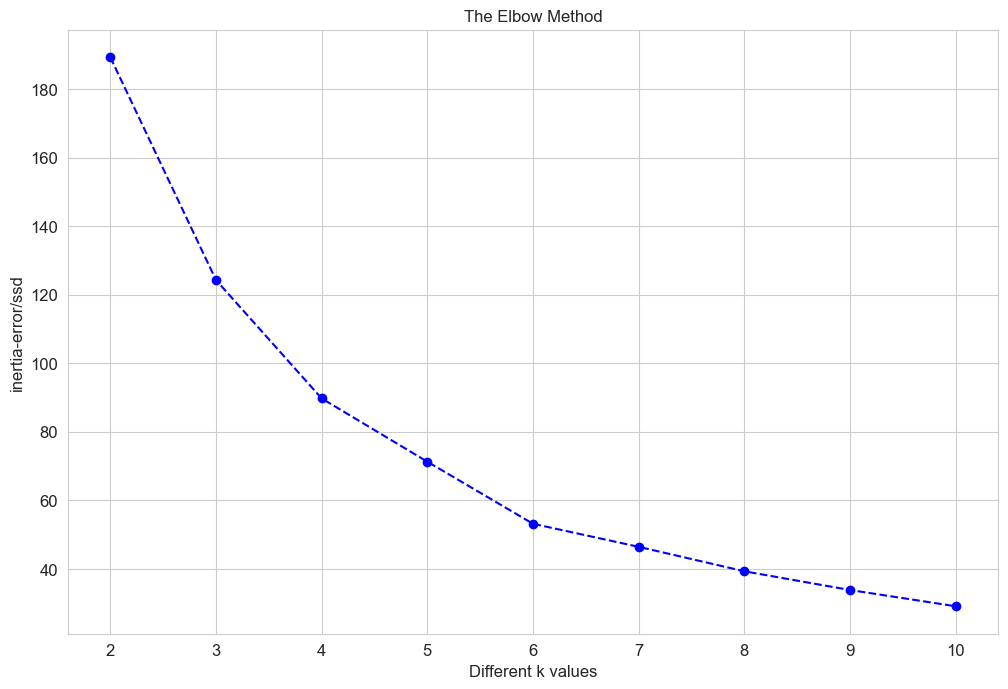

In [72]:
sns.set_style("whitegrid")

ssd =[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(2, 11), ssd, "bo--")
plt.title('The Elbow Method')
plt.xlabel('Different k values')
plt.ylabel('inertia-error/ssd')
plt.show()

In [73]:
ssd

[189.38749033992428,
 124.32628617921527,
 89.7652167658615,
 71.2955659221944,
 53.17373745380916,
 46.446285009491625,
 39.30587325192688,
 33.83644725407147,
 29.094103687087586]

In [74]:
-pd.Series(ssd).diff()

0     NaN
1   65.06
2   34.56
3   18.47
4   18.12
5    6.73
6    7.14
7    5.47
8    4.74
dtype: float64

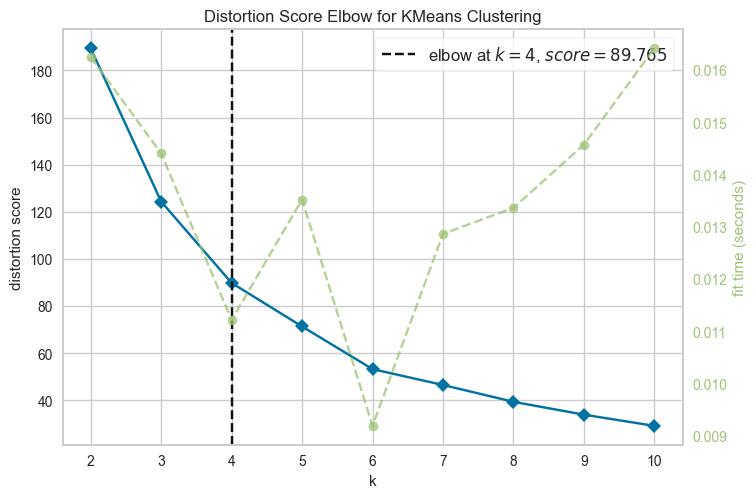

In [75]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

In [76]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [77]:
silhouette_score(X, kmeans.labels_)

0.44189616933636117

In [78]:
sns.set_style("whitegrid")

silhouette_coefficients = [] # for Silhouette method

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_coefficients.append(silhouette_avg)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.47212716430695223
For n_clusters=3, the silhouette score is 0.4395299000230284
For n_clusters=4, the silhouette score is 0.4383860846564478
For n_clusters=5, the silhouette score is 0.4475485887887892
For n_clusters=6, the silhouette score is 0.4531637132878646
For n_clusters=7, the silhouette score is 0.4005396447043195
For n_clusters=8, the silhouette score is 0.41387412992796213
For n_clusters=9, the silhouette score is 0.4230225675097127
For n_clusters=10, the silhouette score is 0.44189616933636117


In [79]:
silhouette_coefficients

[0.47212716430695223,
 0.4395299000230284,
 0.4383860846564478,
 0.4475485887887892,
 0.4531637132878646,
 0.4005396447043195,
 0.41387412992796213,
 0.4230225675097127,
 0.44189616933636117]

In [80]:
optimal_k = pd.DataFrame({'K':range(2,11), 'SSD':ssd, 'silhouette_score':silhouette_coefficients})
optimal_k

,K,SSD,silhouette_score
0,2,189.39,0.47
1,3,124.33,0.44
2,4,89.77,0.44
3,5,71.30,0.45
4,6,53.17,0.45
5,7,46.45,0.40
6,8,39.31,0.41
7,9,33.84,0.42
8,10,29.09,0.44


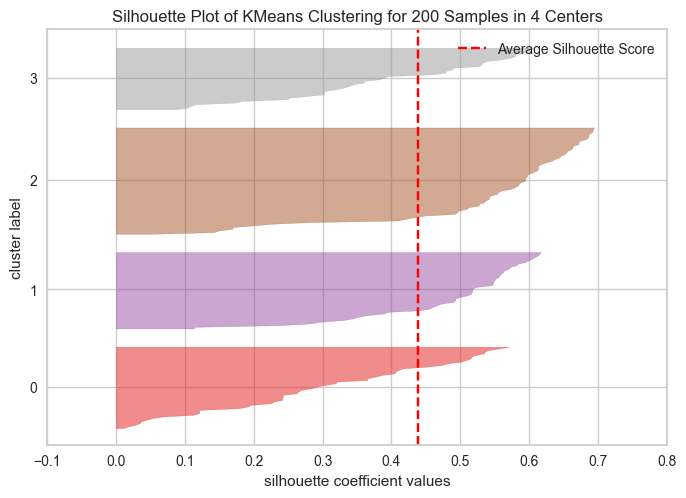

In [81]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model__ = KMeans(n_clusters=4, random_state=42)  
visualizer = SilhouetteVisualizer(model__)

visualizer.fit(X)   
visualizer.poof();

#### *iii. Apply K Means:* Model Building based on the optimal number of clusters

In [82]:
from sklearn.cluster import KMeans

kmeans_model = KMeans( n_clusters=4, random_state=42)
kmeans_model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [83]:
kmeans_model.predict(X)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

In [84]:
kmeans_model.fit_predict(X)

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [85]:
# Learned clusters for each data point in the dataset.
kmeans_model.labels_

array([0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 0, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2], dtype=int32)

In [86]:
clusters = kmeans_model.labels_

In [87]:
X["predicted_clusters"] = clusters
X["predicted_clusters"].value_counts()

2    65
0    50
1    47
3    38
Name: predicted_clusters, dtype: int64

In [88]:
X

,Age,Spending_Score,predicted_clusters
0,-1.42,-0.43,0
1,-1.28,1.20,2
2,-1.35,-1.72,0
3,-1.14,1.04,2
4,-0.56,-0.40,0
...,...,...,...
195,-0.28,1.12,2
196,0.44,-0.86,3
197,-0.49,0.92,2
198,-0.49,-1.25,0


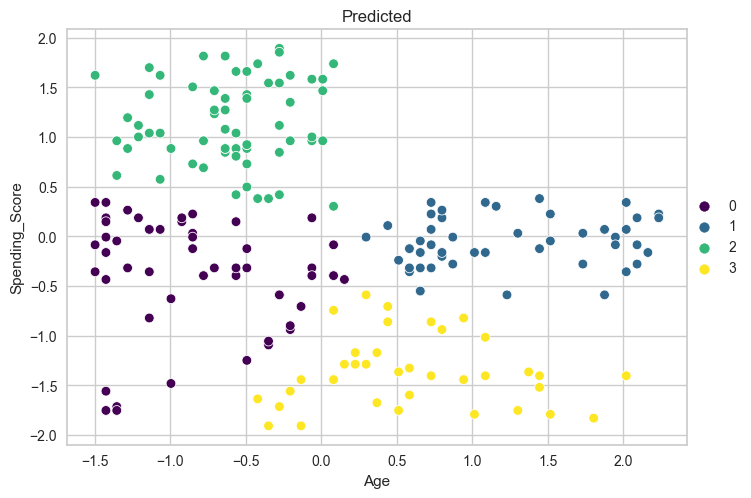

In [89]:
sns.scatterplot(x=X["Age"], 
                y=X["Spending_Score"], 
                hue= X["predicted_clusters"], 
                palette= "viridis")

plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.title("Predicted");
#plt.show()

In [90]:
centers = kmeans_model.cluster_centers_
pd.DataFrame(centers)

,0,1
0,-0.83,-0.39
1,1.23,-0.07
2,-0.61,1.15
3,0.63,-1.37


In [91]:
centers = kmeans_model.cluster_centers_
centers

array([[-0.8346466 , -0.39442706],
       [ 1.22927178, -0.06558366],
       [-0.61415725,  1.14971545],
       [ 0.62833625, -1.36651894]])

In [92]:
centers[:,1]

array([-0.39442706, -0.06558366,  1.14971545, -1.36651894])

In [93]:
centers[:,0]

array([-0.8346466 ,  1.22927178, -0.61415725,  0.62833625])

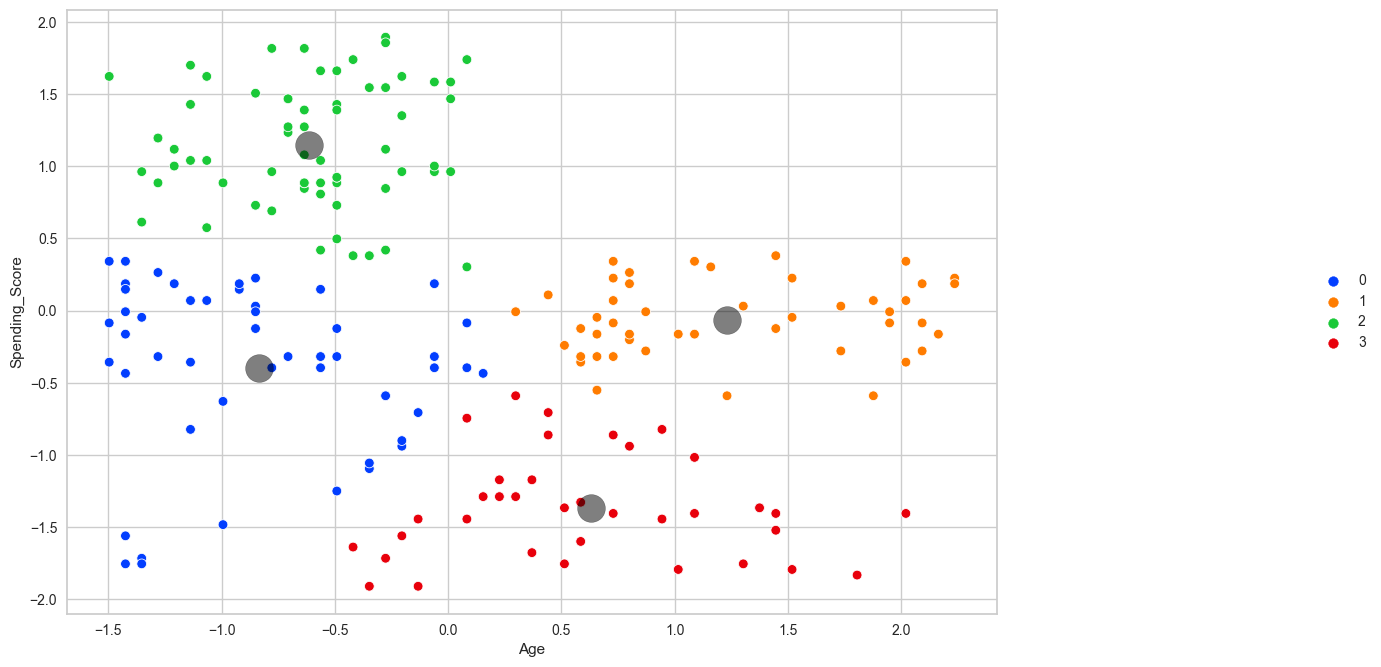

In [94]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x= "Age", y ="Spending_Score",
    data=X, 
    hue= "predicted_clusters", 
    palette= "bright"
)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.5,)
plt.legend(loc="center right", bbox_to_anchor=(1.41,0.5))
plt.show();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [95]:
orginial

,Age,Annual_Income,Spending_Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [96]:
X2 = data[['Annual_Income', 'Spending_Score']]
X2.shape

(200, 2)

In [97]:
X2

,Annual_Income,Spending_Score
0,-1.74,-0.43
1,-1.74,1.20
2,-1.70,-1.72
3,-1.70,1.04
4,-1.66,-0.40
...,...,...
195,2.27,1.12
196,2.50,-0.86
197,2.50,0.92
198,2.92,-1.25


#### *ii. Determine optimal number of clusters*

In [98]:
from sklearn.cluster import KMeans

In [99]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

In [100]:
hopkins(X2, X2.shape[0]), hopkins(X2, X2.shape[0]//2)

(0.2901412652763598, 0.2909522289668677)

In [101]:
hopkins(X2, 50)

0.284558996803282

### Elbow Method 
### use method to find optimal k value by looking up to break point of graph. 

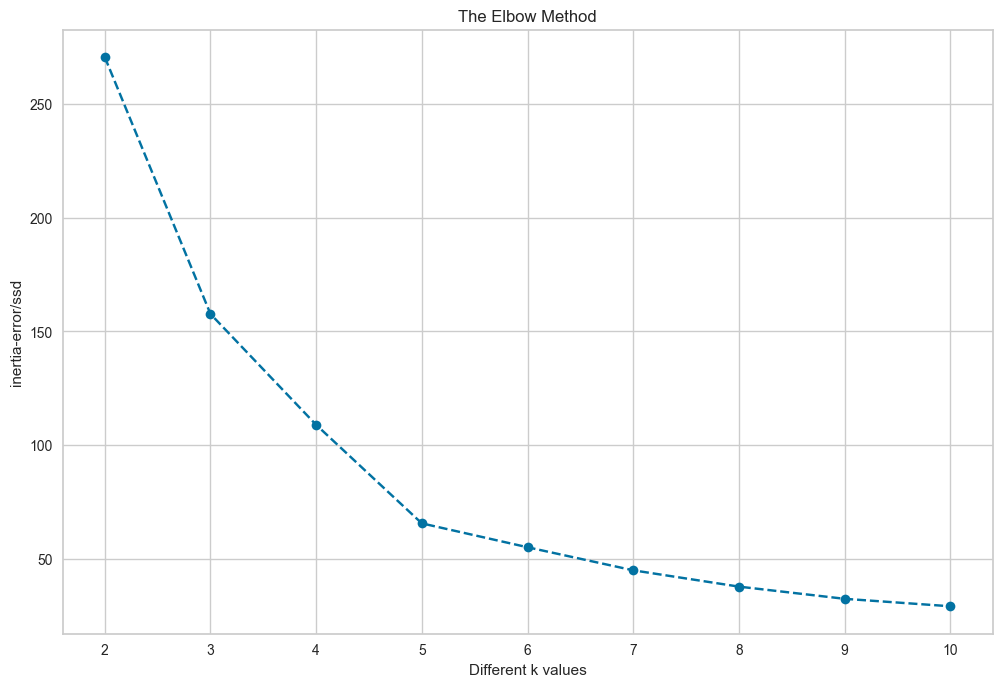

In [102]:
sns.set_style("whitegrid")

ssd =[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(12,8))
plt.plot(range(2, 11), ssd, "bo--")
plt.title('The Elbow Method')
plt.xlabel('Different k values')
plt.ylabel('inertia-error/ssd')
plt.show()

In [103]:
ssd

[270.70426664306717,
 157.7040081503595,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.91118554999015,
 37.7364034625416,
 32.37525368158286,
 29.090568897369717]

In [104]:
-pd.Series(ssd).diff()

0      NaN
1   113.00
2    48.78
3    43.35
4    10.51
5    10.15
6     7.17
7     5.36
8     3.28
dtype: float64

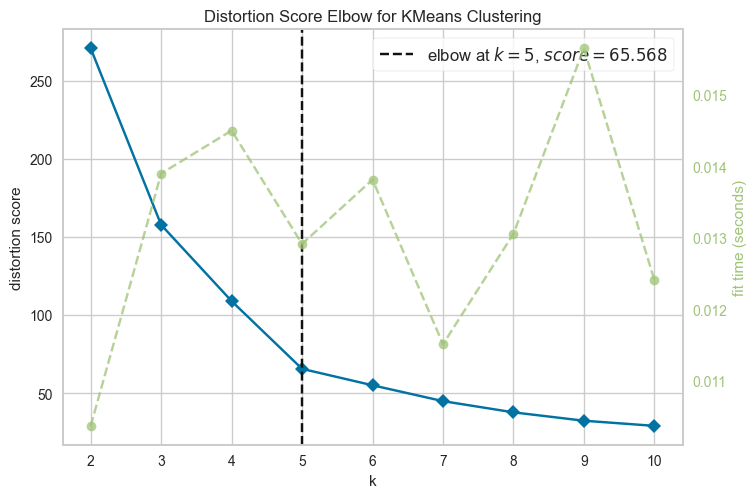

In [105]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X2)       
visualizer.poof();

In [106]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [107]:
silhouette_score(X2, kmeans.labels_)

0.4476280825932578

In [108]:
sns.set_style("whitegrid")

silhouette_coefficients = [] # for Silhouette method

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silhouette_coefficients.append(silhouette_avg)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")


For n_clusters=2, the silhouette score is 0.3146990432802128
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5398800926790663
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45584381231187066
For n_clusters=9, the silhouette score is 0.45532159949822093
For n_clusters=10, the silhouette score is 0.4476280825932578


In [109]:
silhouette_coefficients

[0.3146990432802128,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5398800926790663,
 0.5263454490712252,
 0.45584381231187066,
 0.45532159949822093,
 0.4476280825932578]

In [110]:
optimal_k = pd.DataFrame({'K':range(2,11), 'SSD':ssd, 'silhouette_score':silhouette_coefficients})
optimal_k

,K,SSD,silhouette_score
0,2,270.70,0.31
1,3,157.70,0.47
2,4,108.92,0.49
3,5,65.57,0.55
4,6,55.06,0.54
5,7,44.91,0.53
6,8,37.74,0.46
7,9,32.38,0.46
8,10,29.09,0.45


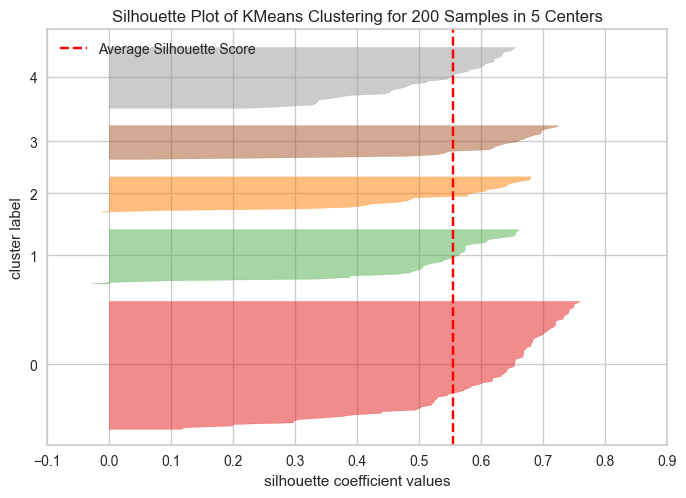

In [111]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model__2 = KMeans(n_clusters=5, random_state=42)  
visualizer = SilhouetteVisualizer(model__2)

visualizer.fit(X2)   
visualizer.poof();

#### *iii. Apply K Means*

In [112]:
from sklearn.cluster import KMeans

kmeans_model2 = KMeans( n_clusters=5, random_state=42)
kmeans_model2.fit(X2)

KMeans(n_clusters=5, random_state=42)

In [113]:
kmeans_model2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [114]:
X2['cluster_Kmeans'] = kmeans_model2.fit_predict(X2) #kmeans2.labels_
X2

,Annual_Income,Spending_Score,cluster_Kmeans
0,-1.74,-0.43,2
1,-1.74,1.20,3
2,-1.70,-1.72,2
3,-1.70,1.04,3
4,-1.66,-0.40,2
...,...,...,...
195,2.27,1.12,4
196,2.50,-0.86,1
197,2.50,0.92,4
198,2.92,-1.25,1


In [115]:
kmeans_model2.fit_predict(X2)

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

#### *iv. Visualizing and Labeling All the Clusters*

In [116]:
# Learned clusters for each data point in the dataset.
kmeans_model2.labels_

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [117]:
X2["predicted_clusters"] = clusters
X2["predicted_clusters"].value_counts()

2    65
0    50
1    47
3    38
Name: predicted_clusters, dtype: int64

In [118]:
X2

,Annual_Income,Spending_Score,cluster_Kmeans,predicted_clusters
0,-1.74,-0.43,2,0
1,-1.74,1.20,3,2
2,-1.70,-1.72,2,0
3,-1.70,1.04,3,2
4,-1.66,-0.40,2,0
...,...,...,...,...
195,2.27,1.12,4,2
196,2.50,-0.86,1,3
197,2.50,0.92,4,2
198,2.92,-1.25,1,0


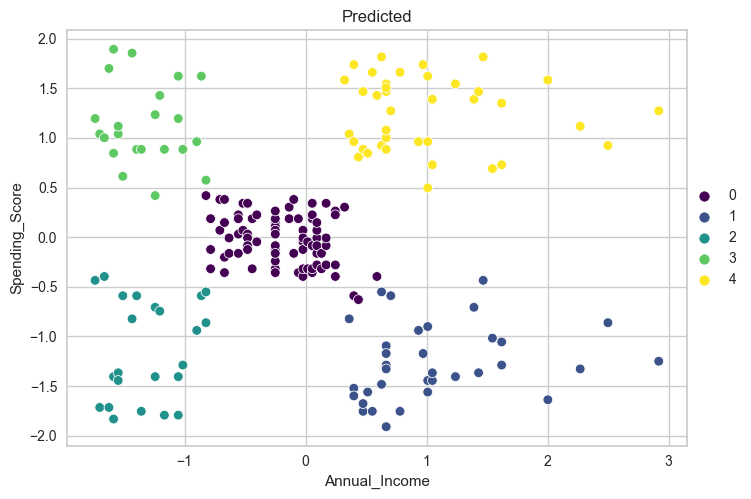

In [119]:
sns.scatterplot(x=X2["Annual_Income"], 
                y=X2["Spending_Score"], 
                hue= X2["cluster_Kmeans"], 
                palette= "viridis")

plt.legend(loc="center right", bbox_to_anchor=(1.1,0.5))
plt.title("Predicted");
#plt.show()


In [120]:
centers = kmeans_model2.cluster_centers_
pd.DataFrame(centers)

,0,1,2
0,-0.20,-0.03,-0.00
1,0.99,1.24,4.00
2,-1.33,1.13,3.00
3,-1.31,-1.14,2.00
4,1.06,-1.28,1.00


In [121]:
centers = kmeans_model2.cluster_centers_
centers

array([[-2.00912566e-01, -2.64561747e-02, -4.44089210e-16],
       [ 9.91583048e-01,  1.23950275e+00,  4.00000000e+00],
       [-1.32954532e+00,  1.13217788e+00,  3.00000000e+00],
       [-1.30751869e+00, -1.13696536e+00,  2.00000000e+00],
       [ 1.05500302e+00, -1.28443907e+00,  1.00000000e+00]])

In [122]:
centers[:,1]

array([-0.02645617,  1.23950275,  1.13217788, -1.13696536, -1.28443907])

In [123]:
centers[:,0]

array([-0.20091257,  0.99158305, -1.32954532, -1.30751869,  1.05500302])

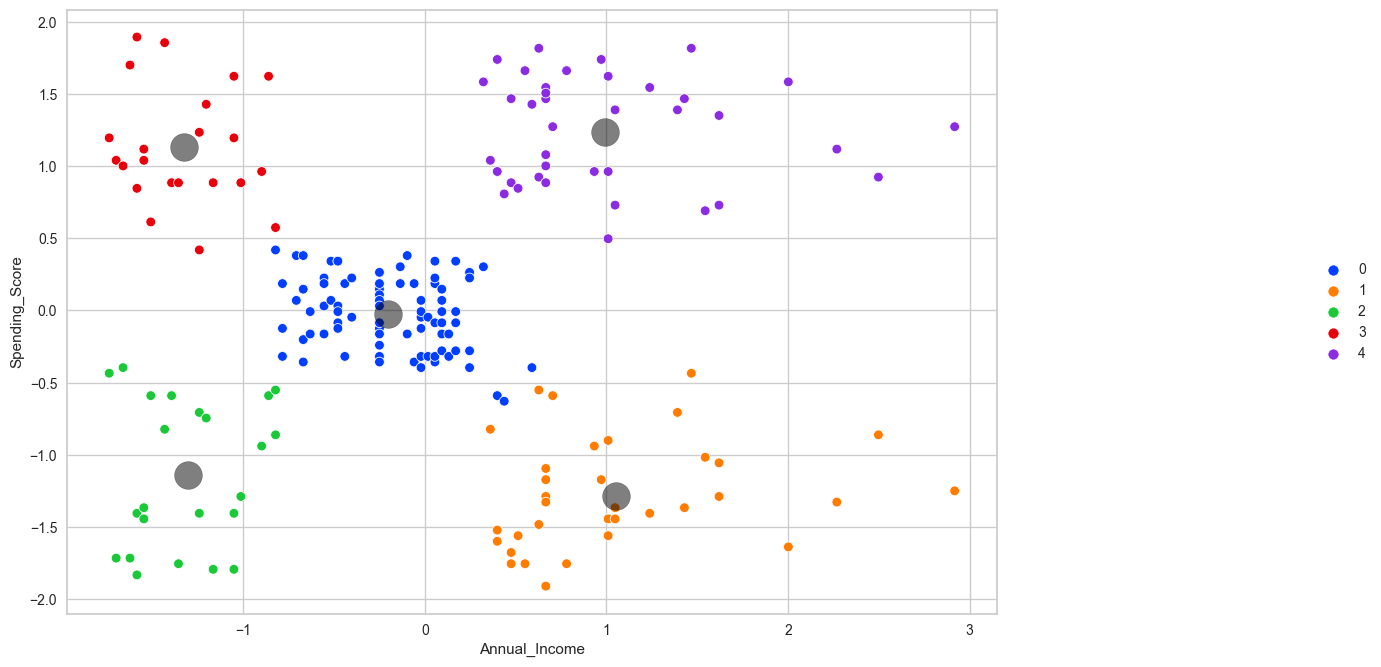

In [124]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x= "Annual_Income", y ="Spending_Score",
    data=X2, 
    hue= "cluster_Kmeans", 
    palette= "bright"
)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.5,)
plt.legend(loc="center right", bbox_to_anchor=(1.41,0.5))
plt.show();

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [125]:
data

,Age,Annual_Income,Spending_Score,Gender
0,-1.42,-1.74,-0.43,1.13
1,-1.28,-1.74,1.20,1.13
2,-1.35,-1.70,-1.72,-0.89
3,-1.14,-1.70,1.04,-0.89
4,-0.56,-1.66,-0.40,-0.89
...,...,...,...,...
195,-0.28,2.27,1.12,-0.89
196,0.44,2.50,-0.86,-0.89
197,-0.49,2.50,0.92,1.13
198,-0.49,2.92,-1.25,1.13


### Clustering based on Age and Spending Score- x3

In [126]:
X3 = data[['Age', 'Spending_Score']]
X3

,Age,Spending_Score
0,-1.42,-0.43
1,-1.28,1.20
2,-1.35,-1.72
3,-1.14,1.04
4,-0.56,-0.40
...,...,...
195,-0.28,1.12
196,0.44,-0.86
197,-0.49,0.92
198,-0.49,-1.25


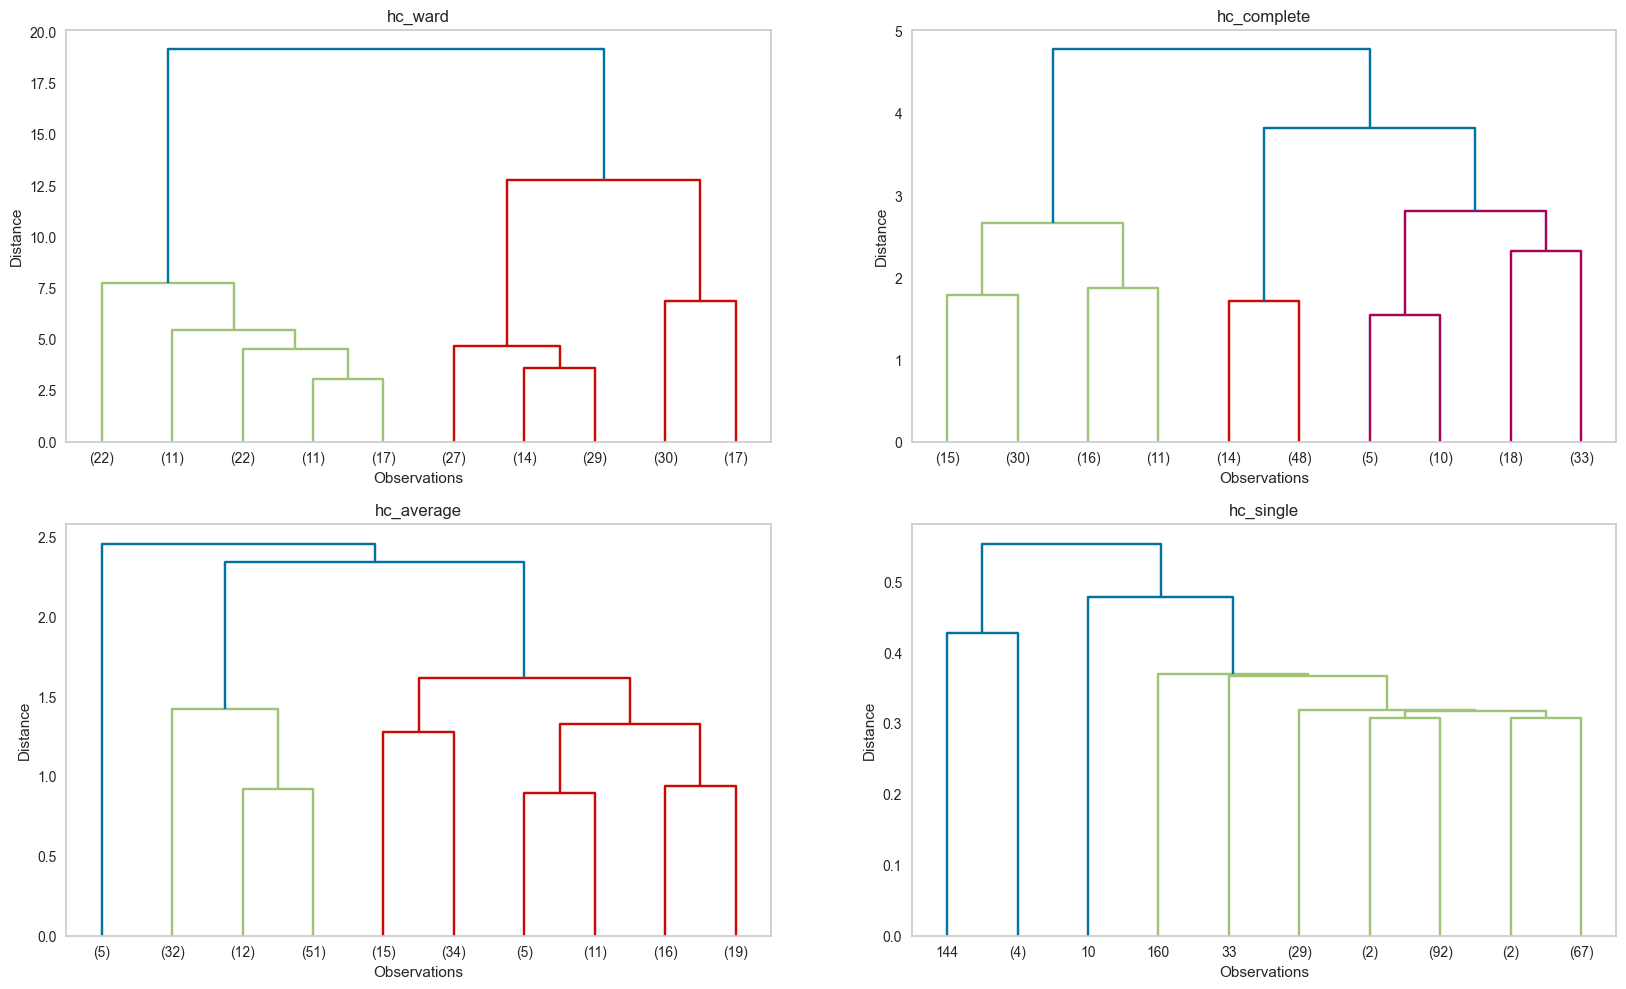

In [127]:
from scipy.cluster.hierarchy import dendrogram, linkage
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

linkage_dict = {"hc_ward" : linkage(y = X3, method = "ward"),
                "hc_complete" : linkage(X3, "complete"),
                "hc_average" : linkage(X3, "average"),
                "hc_single" : linkage(X3, "single")}


plot_list = list(range(221,225))

for _plot, (title, method) in zip(plot_list, linkage_dict.items()):
    plt.subplot(_plot)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(method,truncate_mode = "lastp", p = 10, leaf_font_size = 10)

## Clustering based on Annual Income and Spending Score- x4

In [128]:
X4 = data[['Annual_Income', 'Spending_Score']]
X4

,Annual_Income,Spending_Score
0,-1.74,-0.43
1,-1.74,1.20
2,-1.70,-1.72
3,-1.70,1.04
4,-1.66,-0.40
...,...,...
195,2.27,1.12
196,2.50,-0.86
197,2.50,0.92
198,2.92,-1.25


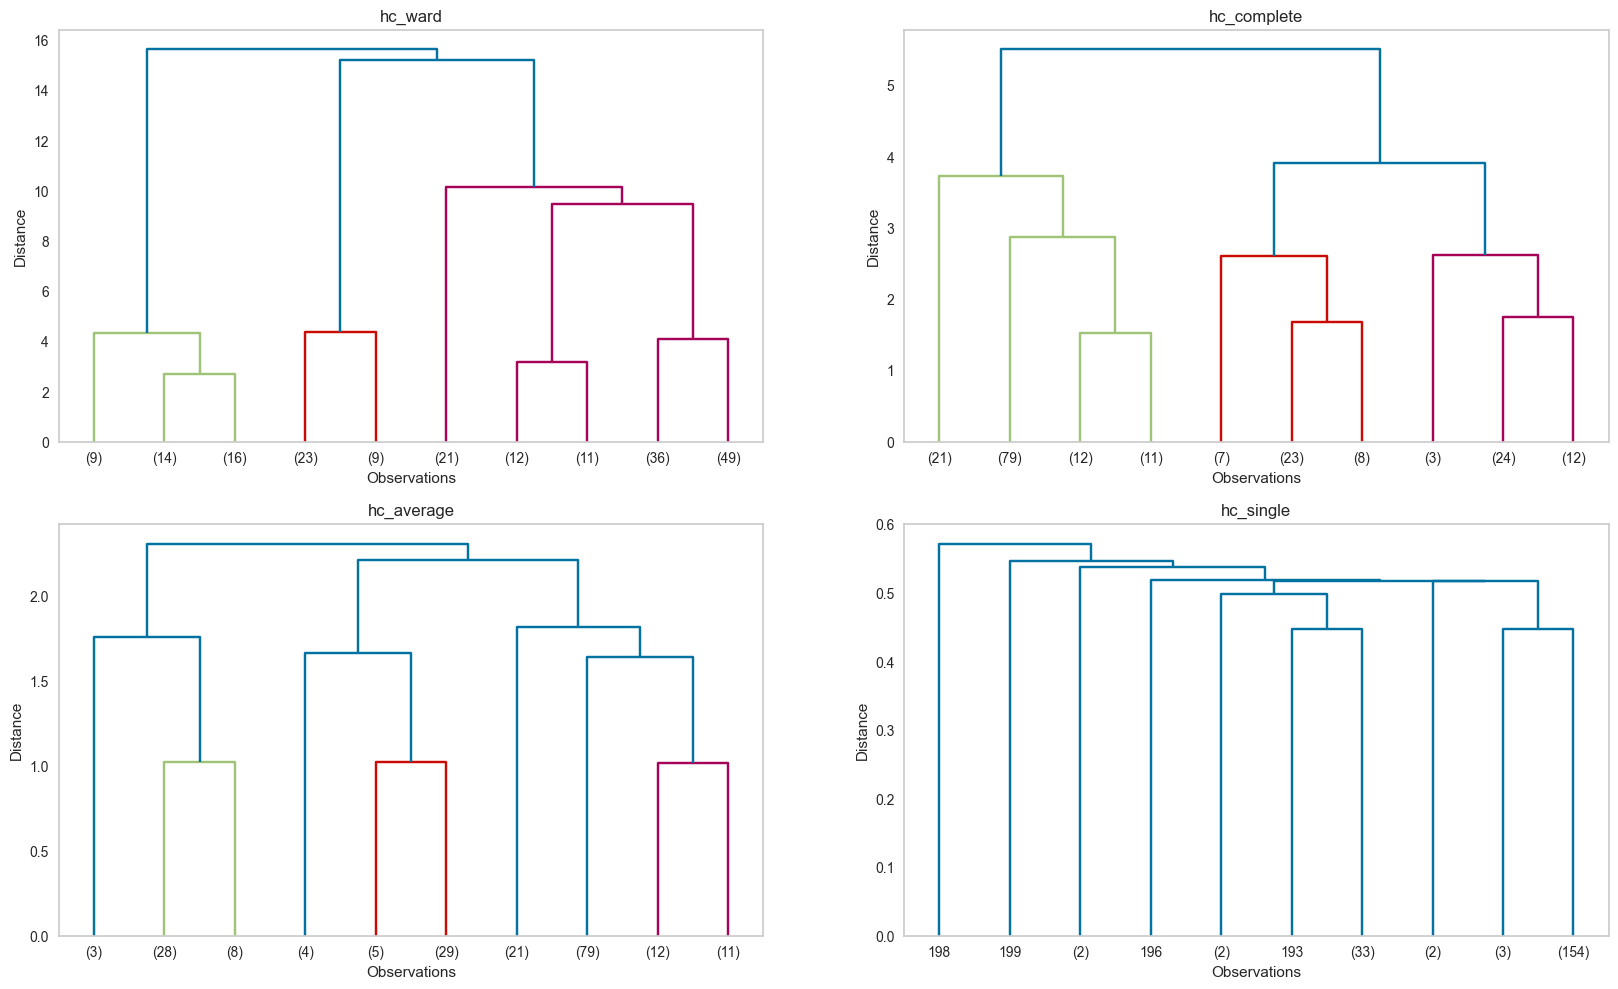

In [129]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20,12))

linkage_dict = {"hc_ward" : linkage(y = X4, method = "ward"),
                "hc_complete" : linkage(X4, "complete"),
                "hc_average" : linkage(X4, "average"),
                "hc_single" : linkage(X4, "single")}


plot_list = list(range(221,225))

for _plot, (title, method) in zip(plot_list, linkage_dict.items()):
    plt.subplot(_plot)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(method,truncate_mode = "lastp", p = 10, leaf_font_size = 10)

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x3

In [130]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X3, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268829986
Silhouette Score for 3 clusters: 0.4166414852049989
Silhouette Score for 4 clusters: 0.38927004893647266
Silhouette Score for 5 clusters: 0.3764554127969015
Silhouette Score for 6 clusters: 0.3990690566558254
Silhouette Score for 7 clusters: 0.358604678369238
Silhouette Score for 8 clusters: 0.361081283331325
Silhouette Score for 9 clusters: 0.3659083749836485


#### Annual Income and Spending Score- x4

In [131]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X4)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X4, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [132]:
model1 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
model1.fit(X3)
model1.labels_
X3['labels'] = model1.labels_
X3

,Age,Spending_Score,labels
0,-1.42,-0.43,0
1,-1.28,1.20,2
2,-1.35,-1.72,0
3,-1.14,1.04,2
4,-0.56,-0.40,0
...,...,...,...
195,-0.28,1.12,2
196,0.44,-0.86,1
197,-0.49,0.92,2
198,-0.49,-1.25,0


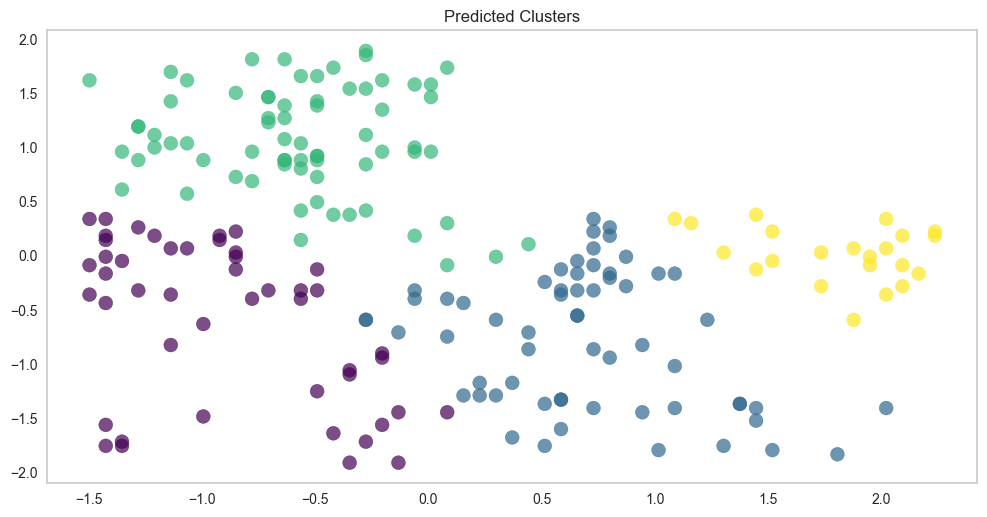

In [133]:
plt.figure(figsize=(12,6))
plt.scatter(X3["Age"], X3["Spending_Score"], c=X3['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")
plt.show();

#### Annual Income and Spending Score- x2

In [134]:
model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
model2.fit(X4)
model2.labels_
X4['labels'] = model2.labels_
X4

,Annual_Income,Spending_Score,labels
0,-1.74,-0.43,4
1,-1.74,1.20,3
2,-1.70,-1.72,4
3,-1.70,1.04,3
4,-1.66,-0.40,4
...,...,...,...
195,2.27,1.12,1
196,2.50,-0.86,0
197,2.50,0.92,1
198,2.92,-1.25,0


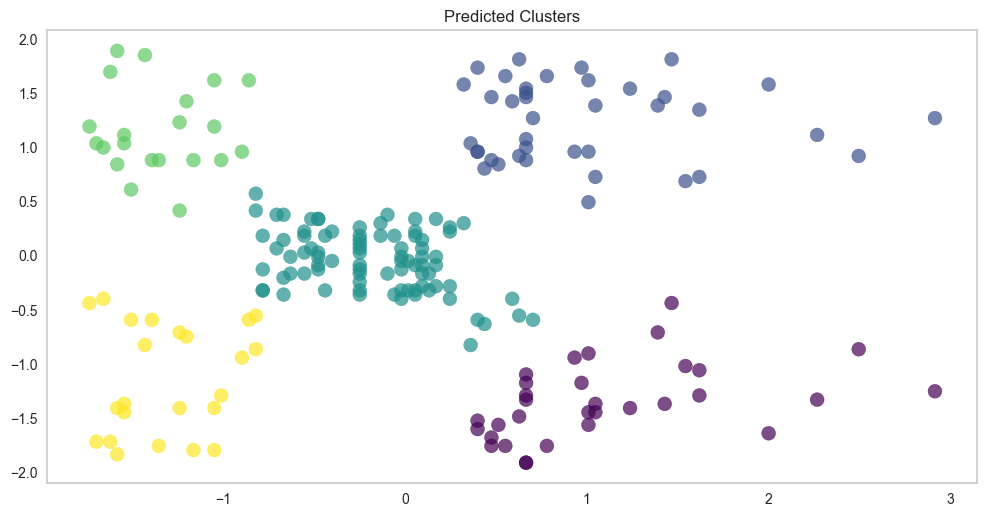

In [135]:
plt.figure(figsize=(12,6))
plt.scatter(X4["Annual_Income"], X4["Spending_Score"], c=X4['labels'], cmap="viridis", alpha=0.7, s=100)
plt.title("Predicted Clusters")
plt.show();

#### Interpretation based on Age and Spending Score- x1

In [136]:
clus_pred = X3.groupby("labels").mean().T
clus_pred

labels,0,1,2,3
Age,-0.89,0.69,-0.57,1.80
Spending_Score,-0.60,-0.78,1.07,0.02


<AxesSubplot:>

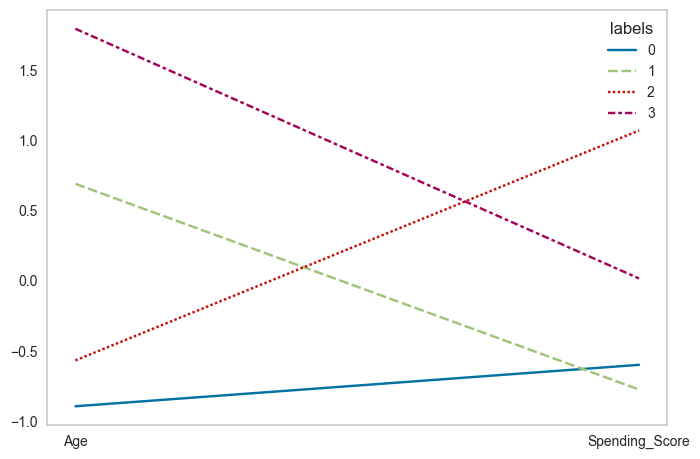

In [137]:
sns.lineplot(data=clus_pred)

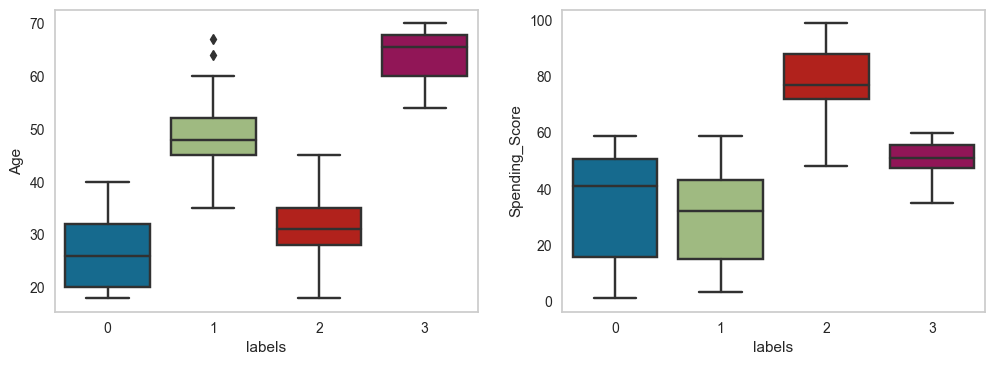

In [138]:
plt.figure(figsize=(12,4))

for i, col in enumerate(X3.columns[:-1]):
    plt.subplot(1, 2, i+1) 
    sns.boxplot(x=X3['labels'], y=col, data=orginial)

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [139]:
clus_pred = X4.groupby("labels").mean().T
clus_pred

labels,0,1,2,3,4
Annual_Income,1.10,0.99,-0.18,-1.35,-1.31
Spending_Score,-1.34,1.24,-0.04,1.16,-1.14


<AxesSubplot:>

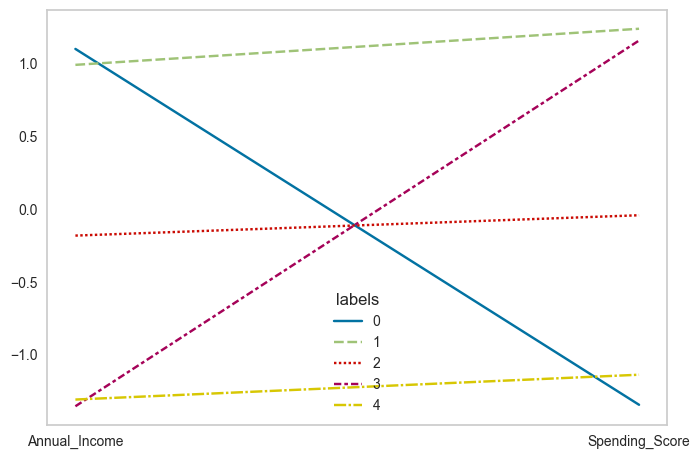

In [140]:
sns.lineplot(data=clus_pred)

In [ ]:
plt.figure(figsize=(12,4))

for i, col in enumerate(X4.columns[:-1]):
    plt.subplot(1, 2, i+1) 
    sns.boxplot(x=X4['labels'], y=col, data=orginial)

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

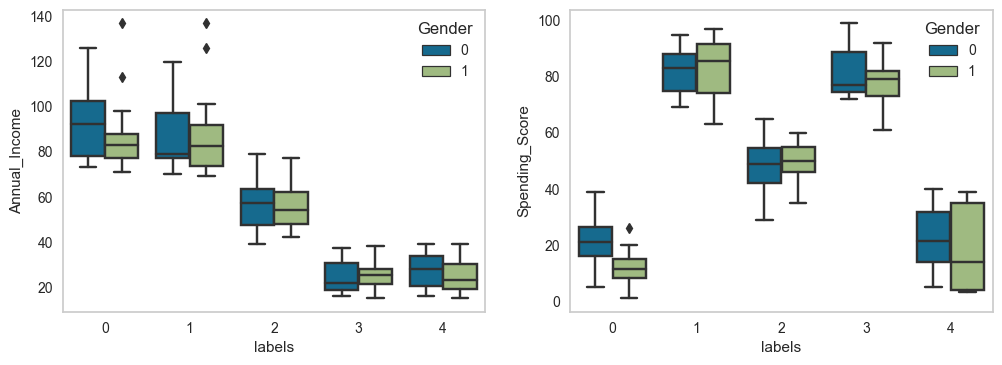

In [142]:
plt.figure(figsize=(12,4))

for i, col in enumerate(X4.columns[:-1]):
    plt.subplot(1, 2, i+1) 
    sns.boxplot(x=X4['labels'], y=col, data=orginial, hue=orginial['Gender'])

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___